In [ ]:


import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from scipy import stats

In [ ]:
data=pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:

data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0], inplace=True)
     

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data['Gender']= lc.fit_transform(data['Gender'])

In [ ]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<ipython-input-75-a9533a3b6a8d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


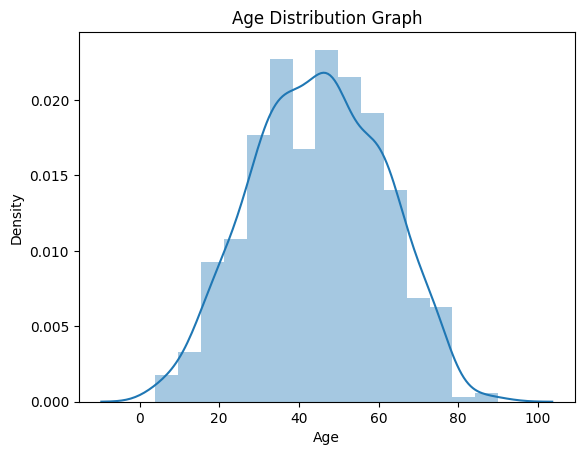

In [ ]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

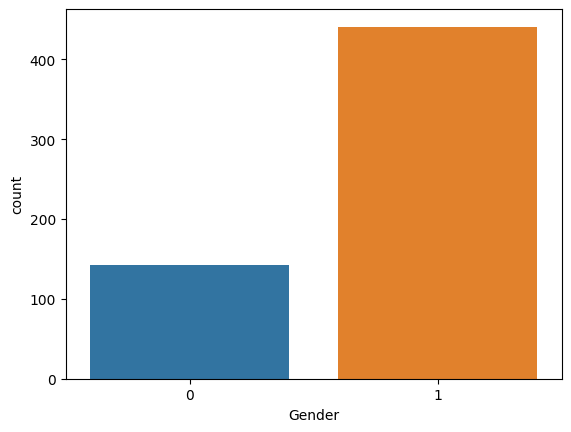

In [ ]:
sns.countplot(data=data,x='Gender')

<Axes: >

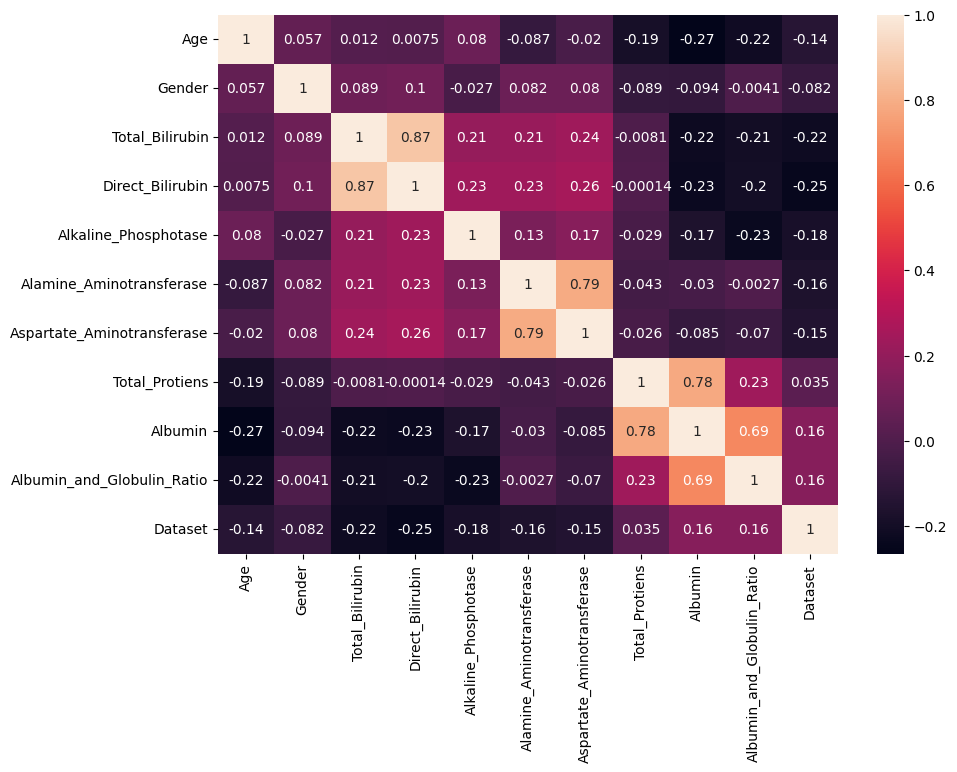

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import scale
X=data[['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin']]
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340


In [ ]:
X=data.iloc[:,:-1]
Y=data.Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [ ]:
pip install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
Y_train.value_counts()

1    329
2    137
Name: Dataset, dtype: int64

In [ ]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)
Y_train_smote.value_counts()

1    329
2    329
Name: Dataset, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train_smote, Y_train_smote)
Y_predict=model1.predict(X_test)
rfc1=accuracy_score(Y_test,Y_predict)
rfc1
pd.crosstab(Y_test, Y_predict)
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           1       0.82      0.78      0.80        87
           2       0.44      0.50      0.47        30

    accuracy                           0.71       117
   macro avg       0.63      0.64      0.63       117
weighted avg       0.72      0.71      0.72       117



In [ ]:
from sklearn.tree import DecisionTreeClassifier 
model4=DecisionTreeClassifier() 
model4.fit(X_train_smote, Y_train_smote) 
Y_predict=model4.predict(X_test) 
dtc1=accuracy_score (Y_test,Y_predict)
dtc1 
pd.crosstab(Y_test,Y_predict) 
print(classification_report (Y_test,Y_predict))

              precision    recall  f1-score   support

           1       0.81      0.78      0.80        87
           2       0.42      0.47      0.44        30

    accuracy                           0.70       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.71      0.70      0.71       117



In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
model2=KNeighborsClassifier() 
model2.fit(X_train_smote,Y_train_smote) 
y_predict = model2.predict(X_test) 
knn1=(accuracy_score (Y_test,Y_predict))
knn1 
pd.crosstab(Y_test,Y_predict) 
print(classification_report (Y_test, Y_predict))

              precision    recall  f1-score   support

           1       0.81      0.78      0.80        87
           2       0.42      0.47      0.44        30

    accuracy                           0.70       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.71      0.70      0.71       117



In [ ]:
from sklearn.linear_model import LogisticRegression 
model5=LogisticRegression() 
model5.fit(X_train_smote, Y_train_smote) 
Y_predict=model5.predict(X_test) 
logi1=accuracy_score(Y_test,Y_predict) 
logi1
pd.crosstab(Y_test,Y_predict) 
print(classification_report (Y_test, Y_predict))

              precision    recall  f1-score   support

           1       0.96      0.55      0.70        87
           2       0.42      0.93      0.58        30

    accuracy                           0.65       117
   macro avg       0.69      0.74      0.64       117
weighted avg       0.82      0.65      0.67       117



In [ ]:
print(X_train.shape)

(466, 9)


In [ ]:
import tensorflow.keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


In [ ]:
#Initialising the ANN 
classifier = Sequential()

In [ ]:
# Adding the input Layer and the first hidden Layer 
classifier.add(Dense(units=100, activation='relu', input_dim=10))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense (units=50, activation='relu'))

In [ ]:
# Adding the output Layer 
classifier.add(Dense (units=1, activation='sigmoid'))

In [ ]:
#compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model2.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model5.predict([[42,0,1,1.2,0.8,240,70,80,7.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def predict_exit(sample_value):
# Convert list to numpy array 
   sample_value = np.array (sample_value)
# Reshape because sample value contains only 1 record 
   sample_value = sample_value.reshape(1, -1)
#Feature Scaling
   sample_value = scale(sample_value)
   return classifier.predict(sample_value)

In [ ]:
#Age Gender Total Bilrubin Direct Bilrubin Alkaline Phosphotase
sample_value = [[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit (sample_value)>0.5:
   print('Prediction: Liver Patient')
else:
   print('Prediction: Healthy ')

1/1 [==============================] - 0s 72ms/step
Prediction: Healthy 


In [ ]:
acc_smote= [['KNN Classifier', knn1], ['RandomForestClassifier', rfc1],
['DecisionTreeClassifier', dtc1], ['Logistic Regression', logi1]] 
Liverpatient_pred= pd.DataFrame(acc_smote, columns = ['classification models', 'accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNN Classifier,0.700855
1,RandomForestClassifier,0.709402
2,DecisionTreeClassifier,0.700855
3,Logistic Regression,0.649573


<Axes: title={'center': 'Classification models & accuracy scores after SMOTE'}, xlabel='classification models', ylabel='accuracy_score'>

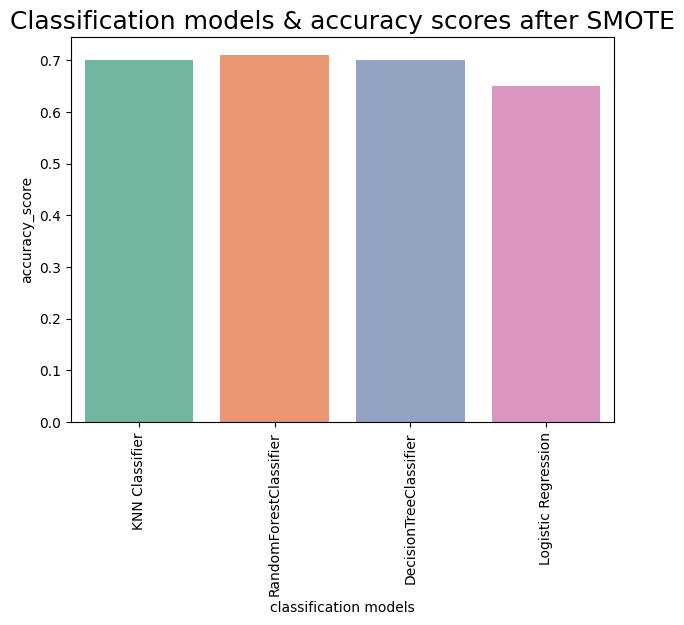

In [ ]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE', fontsize=18)
sns.barplot(x="classification models",y="accuracy_score", data=Liverpatient_pred, palette ="Set2")

In [ ]:
import pandas as pd

X = pd.DataFrame(X)
X = X.dropna()
     

In [ ]:
import numpy as np

nan_mask = np.isnan(X)
X = X[~np.any(nan_mask, axis=1)]  # remove rows with NaN values
     

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y) 

ExtraTreesClassifier()

In [ ]:
model.feature_importances_


array([0.12030706, 0.02516766, 0.11267291, 0.10785248, 0.11777603,
       0.11020431, 0.11452878, 0.0940325 , 0.10084979, 0.09660849])

In [ ]:
X = pd.DataFrame(X)  # Convert X to a pandas DataFrame
dd = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(0, ascending=False)
dd
     

,0
Age,0.120307
Alkaline_Phosphotase,0.117776
Aspartate_Aminotransferase,0.114529
Total_Bilirubin,0.112673
Alamine_Aminotransferase,0.110204
Direct_Bilirubin,0.107852
Albumin,0.100850
Albumin_and_Globulin_Ratio,0.096608
Total_Protiens,0.094033
Gender,0.025168


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

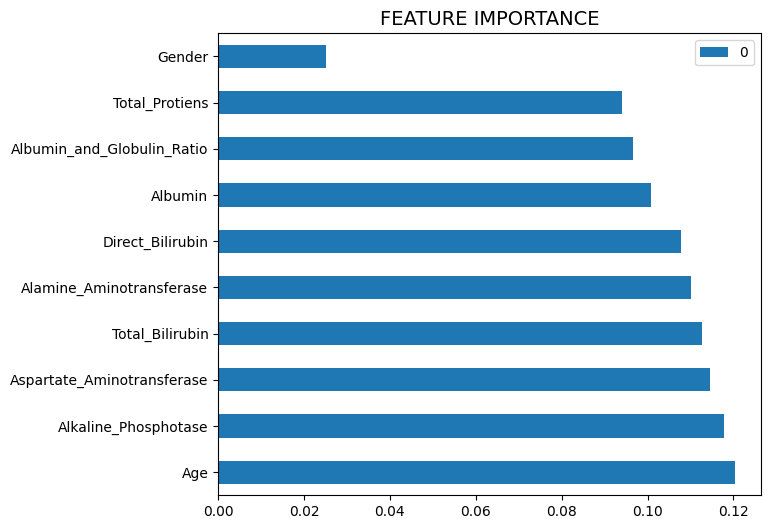

In [ ]:
dd.plot(kind='barh', figsize=(7,6)) 
plt.title("FEATURE IMPORTANCE", fontsize=14)

In [ ]:
import joblib
joblib.dump(model1,'ETC.pkl')

['ETC.pkl']

In [ ]:
from flask import Flask,render_template,request,url_for
import numpy as np
import pickle

app=Flask(__name__)

@app.route('/')
def index():
 return render_template('index.html')


@app.route('/predict',methods=["POST"])
def predict():
 age=request.form['age']
 gender=request.form['gender']
 tb=request.form['tb']
 db=request.form['db']
 ap=request.form['ap']
 aa1=request.form['aa1']
 aa2=request.form['aa2']
 tp=request.form['tp']
 a=request.form['a']
 agr=request.form['agr']
 data=[[float(age),float(gender),float(tb),float(db),float(ap),float(aa1),float(aa2),float(tp),float(a),float(agr)]]
 model=pickle.load(open('ETC.pkl','rb'))
 prediction=model.predict(data)[0]
 if (prediction==1):
     return render_template('result.html',prediction=prediction)
 else:
     return render_template('result.html',prediction=prediction)

if __name__=='__main__':
  app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
